In [128]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os         ##PARA CAMBIAR EL DIRECTORIO
!git clone https://github.com/CarlosCastano33/Prediccion-de-cancelacion-de-reserva.git

Cloning into 'Prediccion-de-cancelacion-de-reserva'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 39 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), 7.12 MiB | 6.06 MiB/s, done.


In [152]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [151]:
!pwd

/content


In [153]:
#Para entrar:
os.chdir('/content/Prediccion-de-cancelacion-de-reserva')

In [150]:
#Para salir:
os.chdir('..')

In [132]:
!ls

 01_exploración_de_datos.ipynb		     sample_submission.csv
 Prediccion-de-cancelacion-de-reserva	     test.csv
'Predicción de cancelación de reserva.pdf'   train.csv
 PROYECTO_ENTREGA2.pdf			    'train XLS After-Fill 2.csv'
 README.md


In [133]:
#CON LA INFORMACIÓN RECUPERADA
d_train = pd.read_csv("train XLS After-Fill 2.csv", sep=';')
d_train

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,28063,2,0,0,1,0,0,0,122,2018,12,27,1,0,0,0,105.30,0,0
28064,28064,2,0,2,2,0,0,3,57,2018,6,27,1,0,0,0,135.99,3,0
28065,28065,2,2,0,3,0,0,3,78,2018,10,25,1,0,0,0,177.30,0,0
28066,28066,1,0,1,2,0,0,0,191,2018,6,30,0,0,0,0,49.50,0,0


In [134]:
d_test = pd.read_csv("test.csv")
d_test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [135]:
import pandas as pd
def apply_get_dummies(dataframe, column_names):
    new_df = dataframe.copy()
        
    for column_name in column_names:
        if column_name in new_df.columns:
          dummies = pd.get_dummies(new_df[column_name], prefix=column_name)
          new_df = pd.concat([new_df, dummies], axis=1)
          del new_df[column_name]
    return new_df


In [136]:
columnas = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
d_train = apply_get_dummies(d_train, columnas)
d_test = apply_get_dummies(d_test, columnas)

In [137]:
serie = d_train.booking_status.copy()
del d_train['booking_status']
d_train = pd.concat([d_train, serie], axis=1)

Eliminamos la columna id

In [138]:
del d_train['id']
del d_test['id']

X e y para train

In [139]:
d_train = d_train.sample(n=15000, replace=False)
X = d_train.iloc[:, :-1]
y = d_train.booking_status

#LINEAR REGRESSION

In [112]:
from sklearn.metrics import accuracy_score

def calculate_accuracy_score(estimator, X, y):
  
  y_pred = estimator.predict(X)
  return accuracy_score(y.astype(int), y_pred.astype(int))

In [145]:
from progressbar import progressbar as pbar
from sklearn.model_selection import train_test_split

def bootstrap_score(estimator, X, y, test_size, n_splits=30):
  trscores, tsscores = [], []
  for _ in range(n_splits):
    Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_size)
    estimator.fit(Xtr, ytr)
    trscores.append(calculate_accuracy_score(estimator, Xtr, ytr))
    tsscores.append(calculate_accuracy_score(estimator, Xts, yts))
  
  return (np.mean(trscores)), (np.mean(tsscores))

In [146]:
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
(trmean), (tsmean) = bootstrap_score(estimator, X, y, test_size=0.3)
print ("train score %.3f"%(trmean))
print ("test score  %.3f"%(tsmean))

train score 0.612
test score  0.611


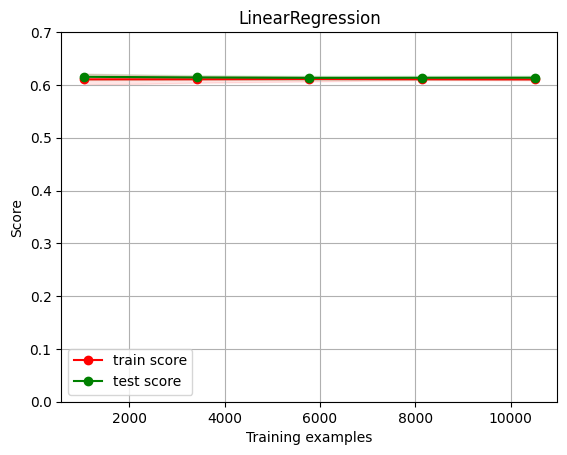

In [154]:
from sklearn.model_selection import ShuffleSplit
from local.lib import calhousing as ch

cv = ShuffleSplit(n_splits=10, test_size=.3)
ch.plot_learning_curve(estimator, estimator.__class__.__name__, X, y, 
                       cv=cv, scoring=calculate_accuracy_score, ylim=(0,0.7))

In [160]:
estimator = DecisionTreeRegressor(max_depth=8)
(trmean), (tsmean) = bootstrap_score(estimator, X, y, test_size=0.3)
print ("train score %.3f"%(trmean))
print ("test score  %.3f"%(tsmean))

train score 0.614
test score  0.608


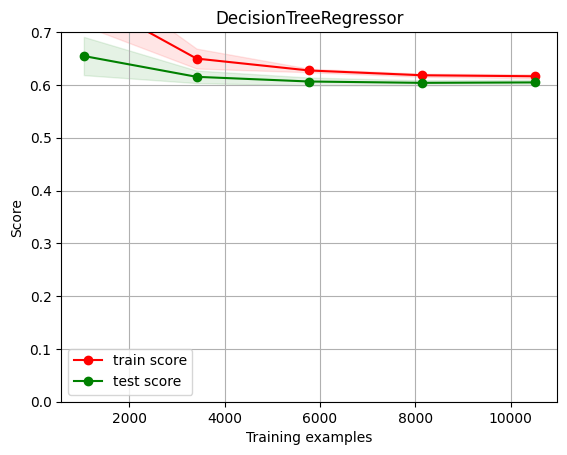

In [156]:
from sklearn.tree import DecisionTreeRegressor
estimator = DecisionTreeRegressor(max_depth=8)
ch.plot_learning_curve(estimator, estimator.__class__.__name__, X, y, cv=cv, 
                       scoring=calculate_accuracy_score, ylim=(0,0.7))